# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.7.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi
  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()
import Pkg; Pkg.add("PyPlot")


In [ ]:
import Pkg; Pkg.add("SciPy")
using SciPy
SciPy.special.factorial(25)

In [ ]:
function facto(n,tot)
    fact = [big(1)]
    i=1
    while i<tot*n
      push!(fact,big(big(fact[i])*big(i)))
      i+=1
    end
    return fact
end

function Poisson_prob(lam,k,fact)
  #if k>=length(fact)
    return (exp(-lam)*(lam^(k)))/SciPy.special.factorial(big(k))
 # else
  #  return (exp(-lam)*(lam^(k)))/fact[Int(k)+1]
  #end
end
function Poisson(lam,fact)
  val = floor(Int64,lam)
  sum = 0
  
  req = rand()
  for i in 0:val-1
    sum  += Poisson_prob(lam,i,fact)
  end
  go = true
  answer = -1
  #print(" ",req)
  while go
    if req > sum && req < sum + Poisson_prob(lam,val,fact)
      go = false
      answer = val
    elseif req <= sum
      val -= 1 
      sum -= Poisson_prob(lam,val,fact)
    elseif req >= sum + Poisson_prob(lam,val,fact)
      sum += Poisson_prob(lam,val,fact)
      val += 1
    end
  end
  return answer
end

Poisson (generic function with 1 method)

Expectation = 9.94
Variance = 10.796400000000006

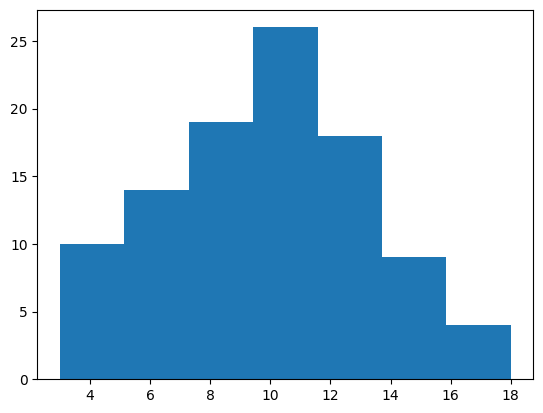

In [ ]:

 #PyPlot.plt[:hist]([x,y],bins=8);
distribution = []
lam = 10
sum = 0
var = 0
tot = 100
fact = facto(lam,tot)
#print(fact[2])
for i in 1:tot
  val = Poisson(lam,fact)
  push!(distribution,val)  
  sum+=val
  var += val*val
  #print(" ",val)
end
variance = var/tot - (sum/tot)^2
print("Expectation = ",sum/tot,)
print("\nVariance = ",variance)
#plot(distribution,x=:Values, kind="histogram")
using PyPlot
PyPlot.plt[:hist](distribution,bins=7);
#distribution

In [ ]:
function Binom_prob(n,p,i)
  return binomial(n,i)*((1-p)^(n-i))*(p^i)
end
function cmax(n,p,lam,fact)
  c = []
  for i in 0:n
    push!(c,Binom_prob(n,p,i)/Poisson_prob(lam,i,fact))
  end
  return maximum(c)
end
function lamcalc(n,p)
  err = 1000
  lam = 5.0
  c = -1
  while err>0.00001
    cm = cmax(n,p,lam,fact)
    cmu = cmax(n,p,lam+0.0001,fact)
    cml = cmax(n,p,lam-0.0001,fact)
    if cmu<cm
      lam+=0.0001
      err=abs(cm-cmu)
    elseif cml<cm
      lam-=0.0001
      err=abs(cm-cml)
    else
      break
    end
  end
  return lam
end
function Binomial(n,p,lam,fact)
  go = true
  answer = -1
  C = cmax(n,p,lam,fact)
  #print(C,'\n')
  while go
    sample = Poisson(lam,fact)
    u = rand()
    ratio = Binom_prob(n,p,sample)/C*Poisson_prob(lam,sample,fact)
    if u < ratio
      go = false
      answer = sample
    end
  end
  return answer
end

Binomial (generic function with 1 method)

Expectation = 7.475
Variance = 1.2813750000000041

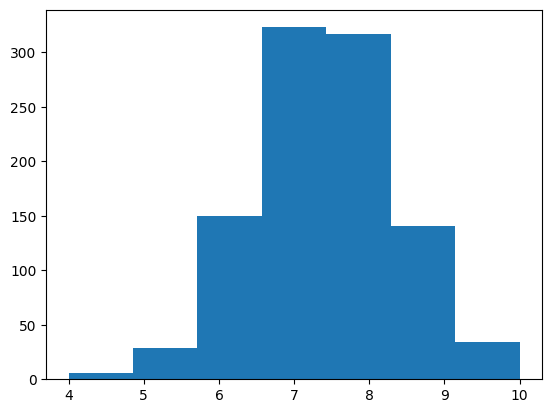

In [ ]:
distribution = []

n = 10
p = 0.75
sum = 0
var = 0
tot = 1000

lam = lamcalc(n,p)
fact = facto(lam,tot)
#print(lam)
for i in 1:tot  
  val = Binomial(n,p,lam,fact)
  #print(val,'\n')
  push!(distribution,val)  
  sum+=val
  var += val*val
  #print(" ",val)
end
variance = var/tot - (sum/tot)^2
print("Expectation = ",sum/tot,)
print("\nVariance = ",variance)
#plot(distribution,x=:Values, kind="histogram")
using PyPlot
PyPlot.plt[:hist](distribution,bins=7);